In [ ]:
Title: EDA ON TITANIC DATASET

In [17]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset from Seaborn
titanic_df = sns.load_dataset('titanic')

In [18]:
print(titanic_df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [19]:
print("\nData Info:")
print(titanic_df.info())

print("\nSummary Statistics:")
print(titanic_df.describe())



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

Summary Statistics:
         survived      pclass         age

In [20]:
print("\nMissing Values:")
print(titanic_df.isnull().sum())



Missing Values:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [21]:
titanic_df['age'].fillna(titanic_df['age'].mean(), inplace=True)



C:\Users\rutuj\AppData\Local\Temp\ipykernel_11628\677601448.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['age'].fillna(titanic_df['age'].mean(), inplace=True)


In [22]:
titanic_df.dropna(subset=['embarked', 'survived'], inplace=True)


In [23]:
titanic_df['sex'] = titanic_df['sex'].astype('category')
titanic_df['embarked'] = titanic_df['embarked'].astype('category')


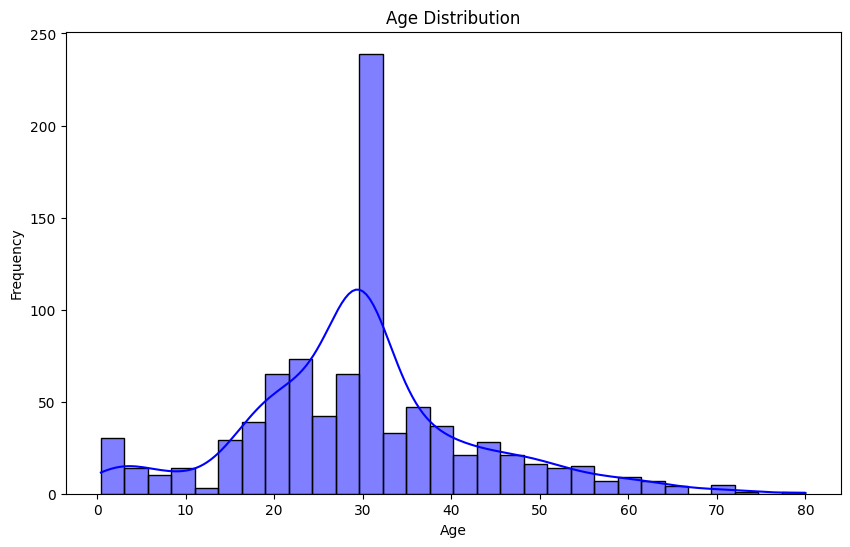

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(titanic_df['age'], kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

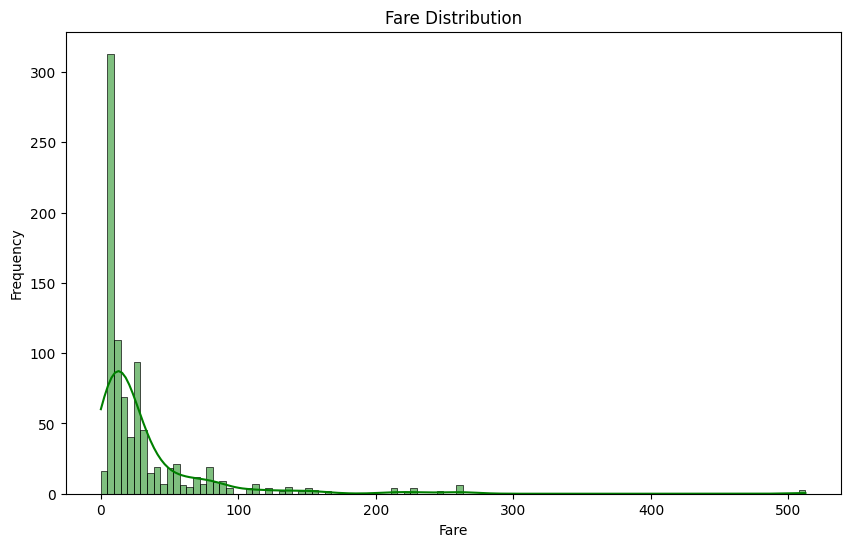

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(titanic_df['fare'], kde=True, color='green')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

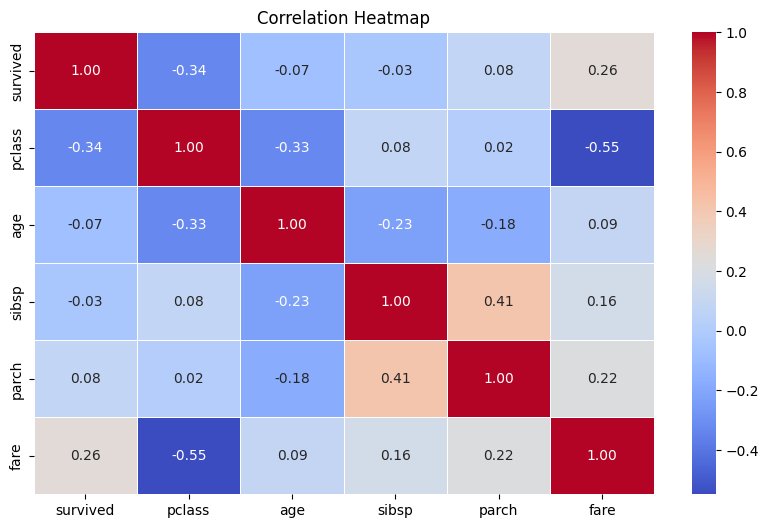

In [26]:
import numpy as np
numeric_df = titanic_df.select_dtypes(include=[np.number])


correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


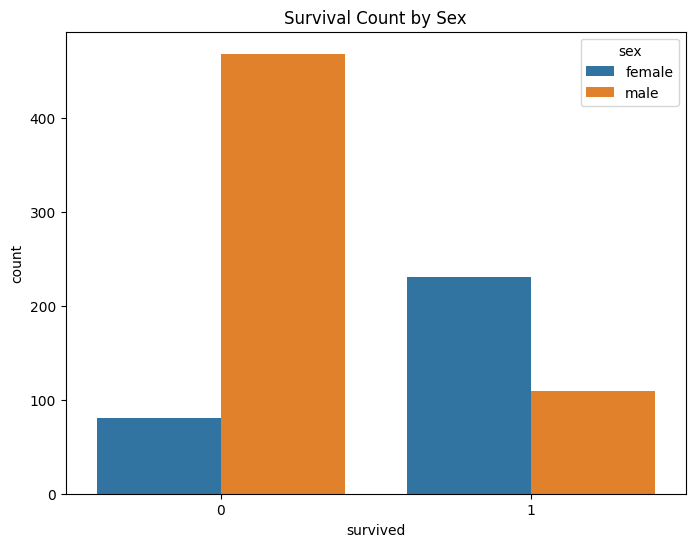

In [27]:

plt.figure(figsize=(8, 6))
sns.countplot(x='survived', hue='sex', data=titanic_df)  
plt.title('Survival Count by Sex')
plt.show()


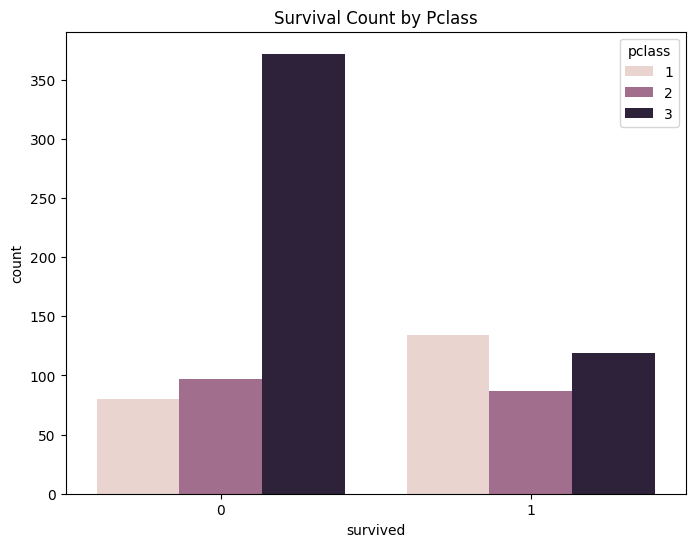

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(x='survived', hue='pclass', data=titanic_df)
plt.title('Survival Count by Pclass')
plt.show()

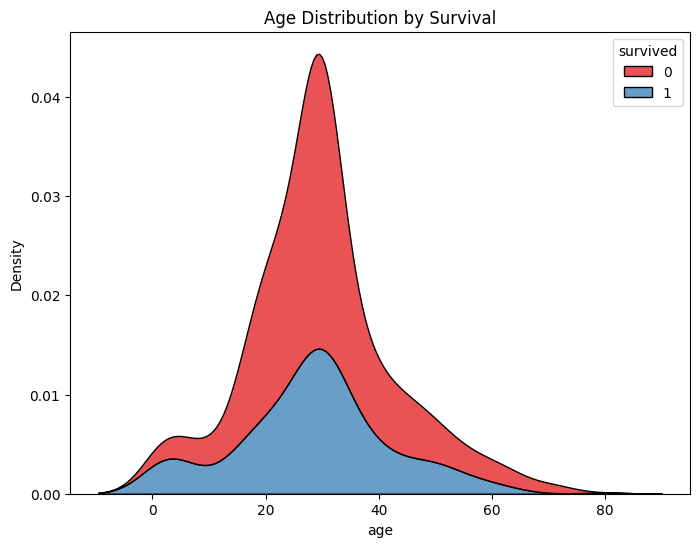

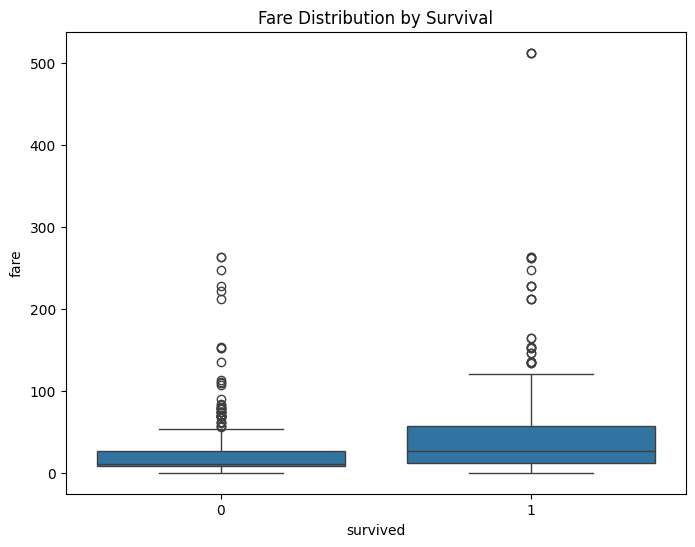

In [29]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=titanic_df, x='age', hue='survived', multiple='stack', palette='Set1')
plt.title('Age Distribution by Survival')
plt.show()

# Survived vs. Fare (Fare distribution for survivors vs non-survivors)
plt.figure(figsize=(8, 6))
sns.boxplot(x='survived', y='fare', data=titanic_df)
plt.title('Fare Distribution by Survival')
plt.show()

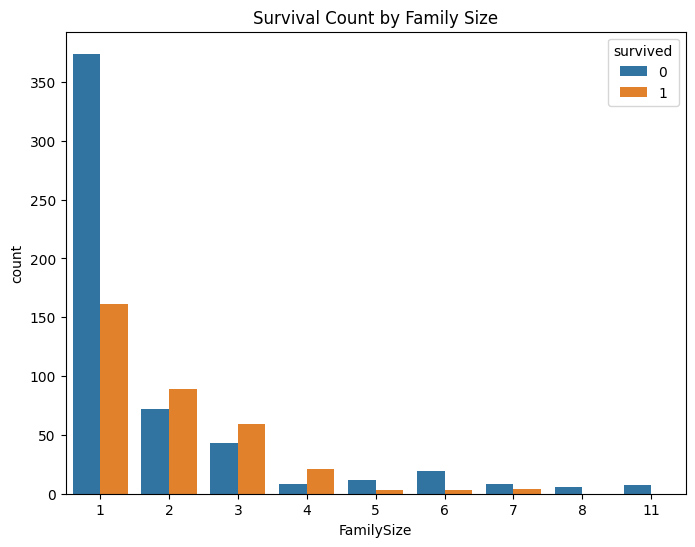

In [30]:
# Create a new feature 'FamilySize' by combining 'sibsp' and 'parch'
titanic_df['FamilySize'] = titanic_df['sibsp'] + titanic_df['parch'] + 1

# Countplot for 'FamilySize' and 'survived'
plt.figure(figsize=(8, 6))
sns.countplot(x='FamilySize', hue='survived', data=titanic_df)  # Corrected column names
plt.title('Survival Count by Family Size')
plt.show()


In [31]:
high_fare = titanic_df[titanic_df['fare'] > 100]
print(f"\nHigh Fare Passengers (fare > 100):")
print(high_fare[['pclass', 'sex', 'age', 'fare', 'survived']])


High Fare Passengers (fare > 100):
     pclass     sex        age      fare  survived
27        1    male  19.000000  263.0000         0
31        1  female  29.699118  146.5208         1
88        1  female  23.000000  263.0000         1
118       1    male  24.000000  247.5208         0
195       1  female  58.000000  146.5208         1
215       1  female  31.000000  113.2750         1
258       1  female  35.000000  512.3292         1
268       1  female  58.000000  153.4625         1
269       1  female  35.000000  135.6333         1
297       1  female   2.000000  151.5500         0
299       1  female  50.000000  247.5208         1
305       1    male   0.920000  151.5500         1
306       1  female  29.699118  110.8833         1
307       1  female  17.000000  108.9000         1
311       1  female  18.000000  262.3750         1
318       1  female  31.000000  164.8667         1
319       1  female  40.000000  134.5000         1
325       1  female  36.000000  135.6333      

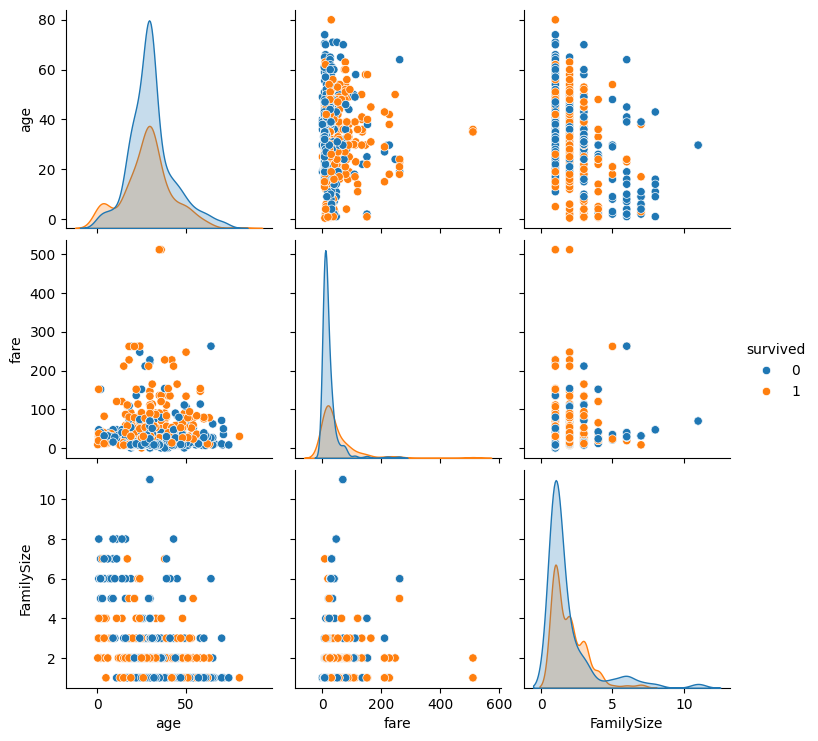

In [16]:

titanic_df['FamilySize'] = titanic_df['sibsp'] + titanic_df['parch'] + 1


sns.pairplot(titanic_df[['age', 'fare', 'FamilySize', 'survived']], hue='survived')
plt.show()


In [ ]:
Name: Rutuja Ingale
Roll no: 13202